# 코로나 감염병 확산 수학
 1. 코로나 감염병 확산 과정을 데이터를 통해 관찰하고, 확산 양상을 수학 모델로 나타낸다.
 2. 코로나 확산은 어떻게 결정될까? 이 질병은 시간이 지나면 사라질까?
 3. 감염병이 발생했을시 확산을 늦추는 방법으로 무엇이 있을까? 그 방법의 효과는?
 4. 백신 접종의 효과는 어떻게 될까? 환자를 얼마나 줄일 수 있을까?
 5. 백신 접종을 언제 얼마나 맞추어야 갖아 효과적일까?
 6. 사회적 거리두기 몇 단계가 효과적일까? 앞으로의 감염자 양상을 어떻게 예상할 수 있을까?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 변수들을 정의하자
# 시간
t0 = 0 # 시작시간
tf = 14 # 끝시간
n = 140 # 격자 개수 1 ~ 14까지 140개로 나누기
h = (tf-t0) / n # 격자 간격
time = np.linspace(t0, tf, n+1) # 시작점, 끝점, 점의 개수(간격수 + 1)의 3가지 변수로 벡터를 생성할 수 있다.

In [ ]:
time

In [ ]:
# 상태 변수 S, I, R
#               행렬생성
initial_value = np.array([51839994.0, 6.0, 0.0])
# [S, I, R] S = N(전체 인구수 - I(감염된 인구수)) 감염될 인구수
x = np.array((n+1)*[initial_value])
#           초기값(1*3행렬)을 n+1시간 개수만큼 행방향 생성(결국(n+1)*3 행렬)

In [ ]:
x

In [ ]:
# 나머지 변수
N = 51840000
beta = 0.4 ## 감염상수
gamma = 1/14 ## 회복률

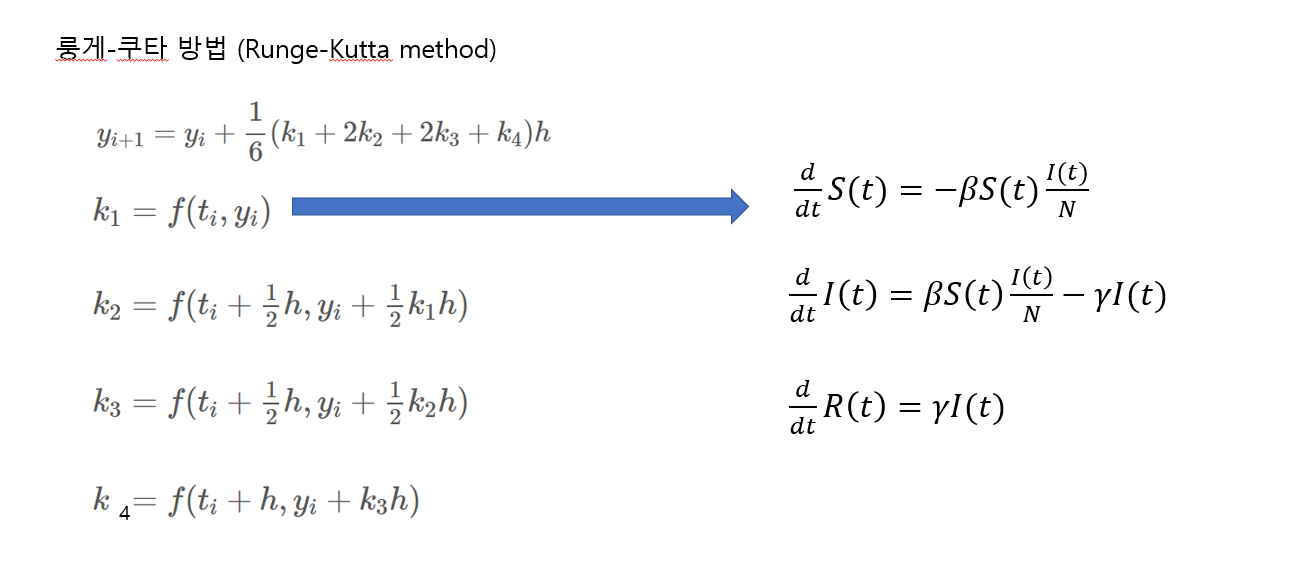

In [ ]:
# k1 = [dS, dI, dR]

S = x[0, 0]
I = x[0, 1]
R = x[0, 2]

dS = -beta * S * I/N
dI = beta * S * I/N - gamma*I
dR = gamma * I

k1 = np.array([dS, dI, dR])

In [ ]:
R

In [ ]:
k1

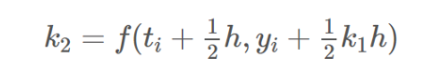

In [ ]:
S = x[0, 0] + k1[0] * h/2
I = x[0, 1] + k1[1] * h/2
R = x[0, 2] + k1[2] * h/2

dS = -beta * S * I/N
dI = beta * S * I/N - gamma*I
dR = gamma * I

k2 = np.array([dS, dI, dR])

In [ ]:
k2

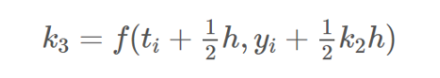

In [ ]:
S = x[0, 0] + k2[0] * h/2
I = x[0, 1] + k2[1] * h/2
R = x[0, 2] + k2[2] * h/2

dS = -beta * S * I/N
dI = beta * S * I/N - gamma*I
dR = gamma * I

k3 = np.array([dS, dI, dR])

In [ ]:
k3

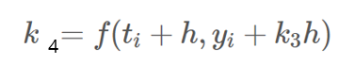

In [ ]:
S = x[0, 0] + k3[0] * h
I = x[0, 1] + k3[1] * h
R = x[0, 2] + k3[2] * h

dS = -beta * S * I/N
dI = beta * S * I/N - gamma*I
dR = gamma * I

k4 = np.array([dS, dI, dR])

In [ ]:
k4

In [ ]:
x[1] = x[0] + h * (k1+2 * k2+2 * k3 + k4) / 6

In [ ]:
x[1]

In [ ]:
# 반복문
# 연속된 숫자(정수)를 만들어 주는 range()함수 range(시작숫자, 마지막숫자(포함안함), 간격)
# 숫자 하나면 마지막 숫자임(0부터 1간격)
for i in range(n):
    S = x[i, 0]
    I = x[i, 1]
    R = x[i, 2]
    dS = -beta * S * I/N
    dI = beta * S * I/N - gamma*I
    dR = gamma * I
    k1 = np.array([dS, dI, dR])
    
    S = x[i, 0] + k1[0] * h/2
    I = x[i, 1] + k1[1] * h/2
    R = x[i, 2] + k1[2] * h/2
    dS = -beta * S * I/N
    dI = beta * S * I/N - gamma*I
    dR = gamma * I
    k2 = np.array([dS, dI, dR])
    
    S = x[i, 0] + k2[0] * h/2
    I = x[i, 1] + k2[1] * h/2
    R = x[i, 2] + k2[2] * h/2
    dS = -beta * S * I/N
    dI = beta * S * I/N - gamma*I
    dR = gamma * I
    k3 = np.array([dS, dI, dR])
    
    S = x[i, 0] + k3[0] * h
    I = x[i, 1] + k3[1] * h
    R = x[i, 2] + k3[2] * h
    dS = -beta * S * I/N
    dI = beta * S * I/N - gamma*I
    dR = gamma * I
    k4 = np.array([dS, dI, dR])
    
    x[i + 1] = x[i] + h * (k1 + 2 * (k2 + k3) + k4) / 6

In [ ]:
x

# Matplotlib 이용한 그림 그리기

In [ ]:
plt.figure(figsize = (10, 5)) # 그림 크기 설정
t = time
I_t = x[:, 1] # 모든 2열 I가져오기
R_t = x[:, 2] # 모든 3열 R가져오기
lines = plt.plot(t, I_t, 'r', t, R_t, 'g')
#                   색 설정 red  색 설정 green
plt.setp(lines[0], linewidth = 3) # 그림 셋업
plt.setp(lines[1], linewidth = 3)
plt.xlabel('date') # x라벨
plt.ylabel('Population') # y라벨
plt.legend(('I', 'R'), fontsize = 10, loc = 'best') 
#                                  best = 적정위치에 알아서 upper right = 오른쪽 위에(범례설정)
plt.title('COVID-19') # 제목
plt.show()

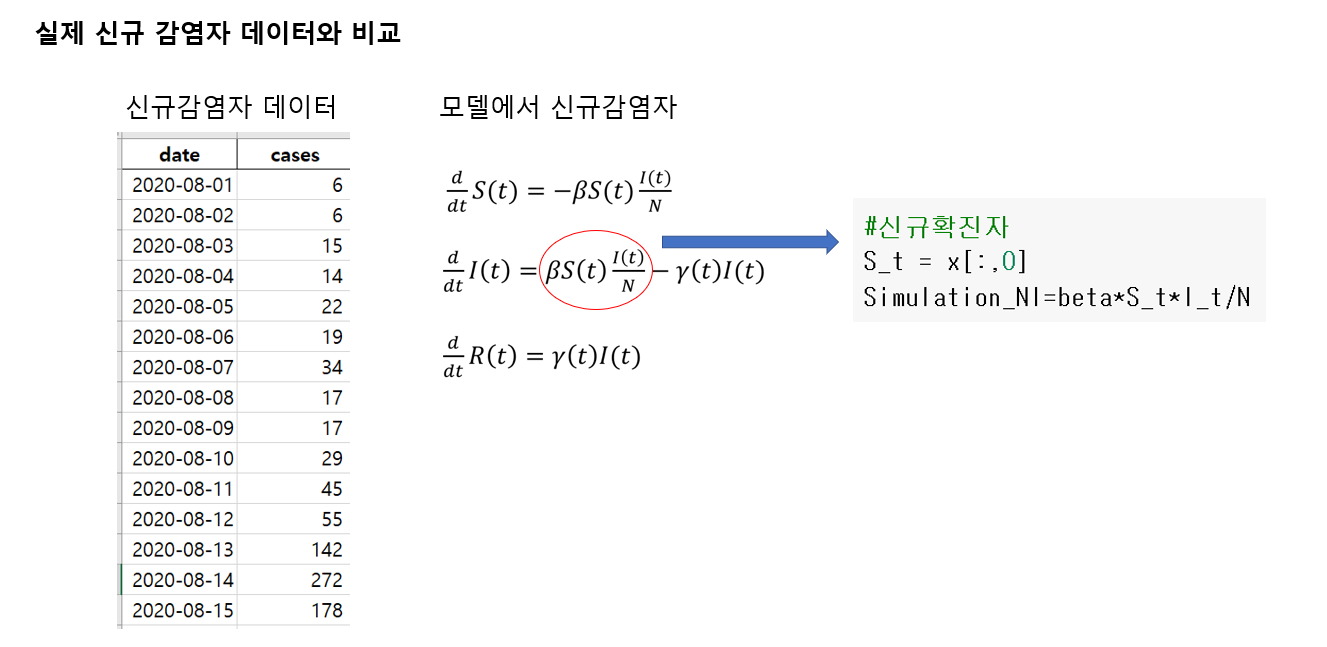S_t

In [ ]:
# 신규확진자
S_t = x[:, 0]
Simulation_NI = beta * S_t * I_t / N

In [ ]:
# pd.read_excel로 xlsx파일 불러오기
data = pd.read_excel('Cases(COVID-19)_test1.xlsx')
data

In [ ]:
data.loc[0:14, 'cases'] # pandas에서 데이터를 불러올때 loc함수 사용

In [ ]:
plt.figure(figsize = (10, 5)) # 그림 크기 설정
t1 = data.index[0:15]
t2 = time
y1 = data.loc[0:14, 'cases']
y2 = Simulation_NI
lines = plt.plot(t1, y1, '*b', t2, y2, 'r')
# 데이터는 보통 점으로 표시한다.

plt.setp(lines[0], markersize = 5) # 그림 셋업
plt.setp(lines[1], linewidth = 3)
plt.xlabel('date') # x라벨
plt.ylabel('Population') # y라벨
plt.legend(('observed cases', 'Simulation cases'), fontsize = 10, loc = 'best') # upper right 
plt.title('COVID-19') # 제목
plt.show()